In [6]:
import networkx as nx
import csv
import matplotlib.pyplot as plt
import random
import numpy as np
from tqdm import tqdm
from networkx.algorithms.community import greedy_modularity_communities
from networkx.algorithms.community import louvain_communities
import networkx.algorithms.community
from tqdm import tqdm
import pandas as pd

## Functions

In [7]:
def modularity(G, communities):

    '''For undirected graphs'''

    Q = 0
    m = G.number_of_edges()
    
    for community in communities:
        subgraph = G.subgraph(community)
        L_c=subgraph.number_of_edges()         
        k_c=sum(dict(G.degree(community)).values())  
        
        Q+=(L_c/m)-(k_c/(2*m))**2

    return Q

def assortivity_coeff(G,communities):

    '''For undirected graphs'''

    Q = 0
    m = G.number_of_edges()
    Q_max=1
    
    for community in communities:
        subgraph = G.subgraph(community)
        L_c=subgraph.number_of_edges()         
        k_c=sum(dict(G.degree(community)).values())  
        
        Q+=(L_c/m)-(k_c/(2*m))**2
        Q_max-=(k_c/(2*m))**2
         
    return Q/Q_max

## Loading Graph

In [8]:
# Load the graph
G = nx.read_edgelist("general_relativity_collab.txt", nodetype=int)
G.remove_edges_from(nx.selfloop_edges(G))

In [9]:
print("Number of connected components:",nx.number_connected_components(G))

Number of connected components: 355


In [10]:
components=nx.connected_components(G)
largest_component=G.subgraph(max(list(components),key=len))

C:\Users\Tvisha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\networkx\drawing\nx_pylab.py:1438: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


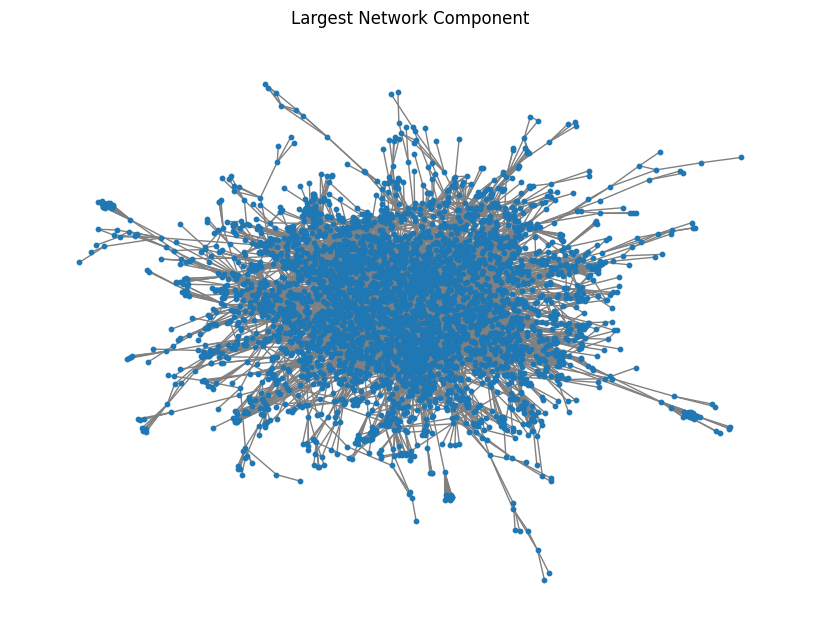

In [11]:
pos = nx.spring_layout(G,seed=42)

plt.figure(figsize=(8, 6))
nx.draw(largest_component, pos,
        node_size=10,
        cmap=plt.cm.tab10,
        edge_color='gray')
plt.title("Largest Network Component")
plt.show()

# Community detection on the full graph

## Greedy Algorithm

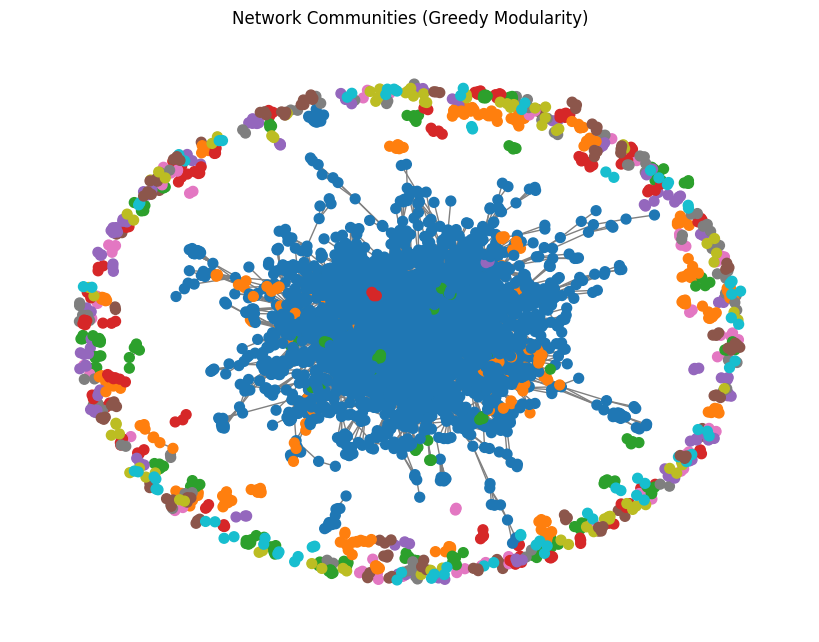

In [12]:
greedy_communities = list(greedy_modularity_communities(G))


node_community = {}
for i, comm in enumerate(greedy_communities):
    for node in comm:
        node_community[node] = i


colors = [node_community[node] for node in G.nodes()]


pos = nx.spring_layout(G,seed=42)


plt.figure(figsize=(8, 6))
nx.draw(G, pos,
        node_color=colors,
        node_size=50,
        cmap=plt.cm.tab10,
        edge_color='gray')

plt.title("Network Communities (Greedy Modularity)")
plt.axis('off')
plt.show()

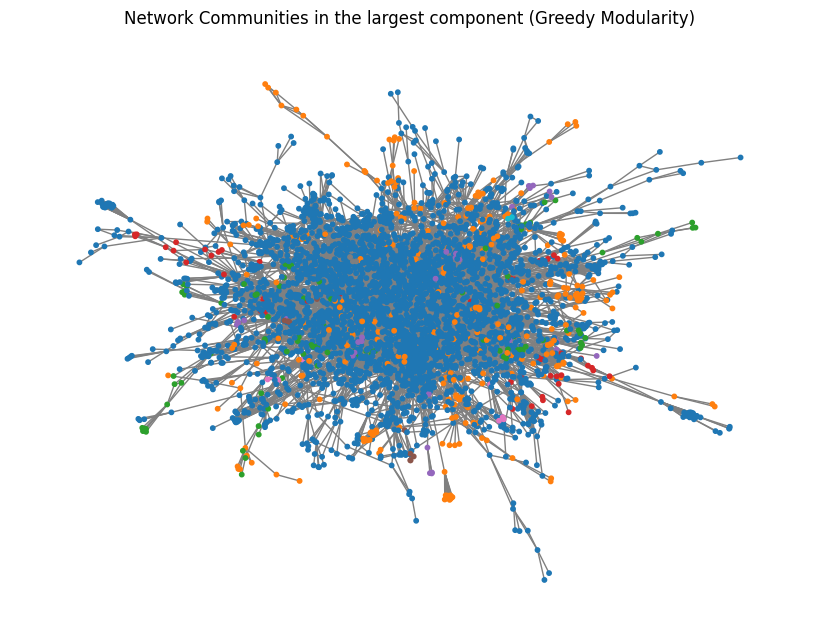

In [13]:
colors = [node_community[node] for node in largest_component.nodes()]
pos = nx.spring_layout(G,seed=42)

plt.figure(figsize=(8, 6))
nx.draw(largest_component, pos,
        node_color=colors,
        node_size=10,
        cmap=plt.cm.tab10,
        edge_color='gray')
plt.title("Network Communities in the largest component (Greedy Modularity)")
plt.show()

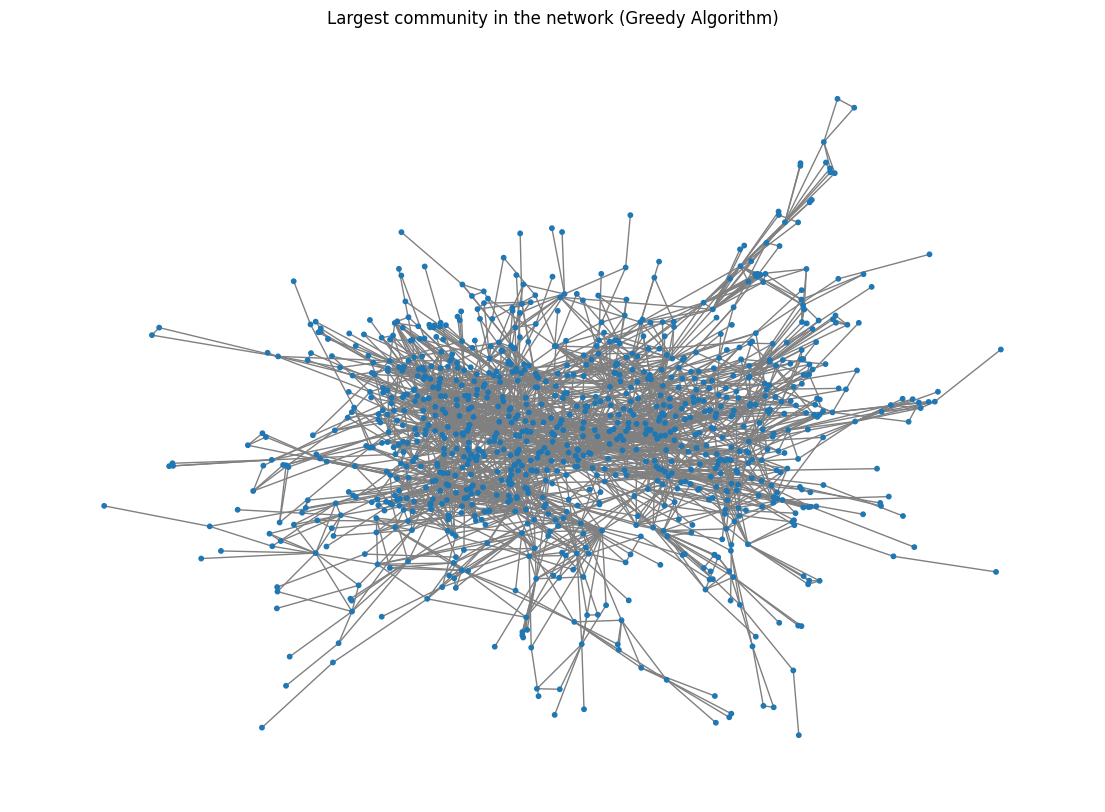

1011
1


In [14]:
largest_community=G.subgraph(max(greedy_communities,key=len))

colors = [node_community[node] for node in largest_community.nodes()]

pos = nx.spring_layout(G,seed=42)

plt.figure(figsize=(14, 10))
plt.title("Largest community in the network (Greedy Algorithm)")
nx.draw(largest_community, pos,
        node_color=colors,
        node_size=10,
        cmap=plt.cm.tab10,
        edge_color='gray')
plt.show()

print(len(largest_community.nodes))
print(nx.number_connected_components(largest_community))

## Louvain Method

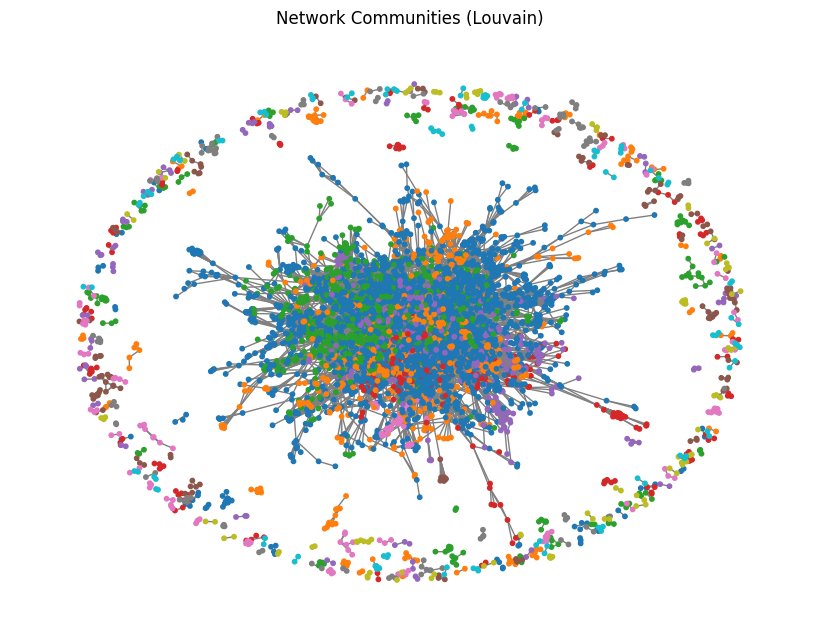

In [15]:
louvain_communities=networkx.algorithms.community.louvain_communities(G)
node_community = {}

for i, comm in enumerate(louvain_communities):
    for node in comm:
        node_community[node] = i


colors = [node_community[node] for node in G.nodes()]


pos = nx.spring_layout(G,seed=42)


plt.figure(figsize=(8, 6))
nx.draw(G, pos,
        node_color=colors,
        node_size=10,
        cmap=plt.cm.tab10,
        edge_color='gray')

plt.title("Network Communities (Louvain)")
plt.axis('off')
plt.show()


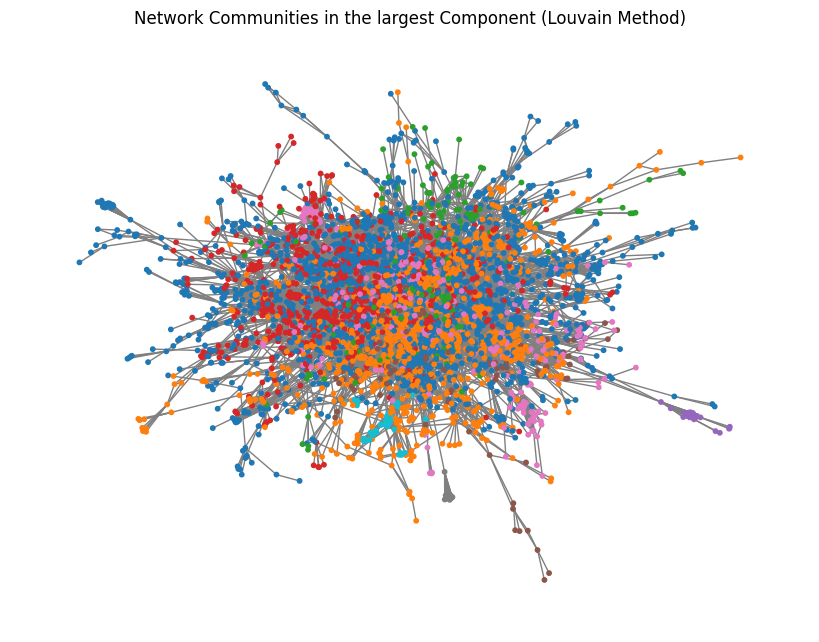

In [16]:
colors = [node_community[node] for node in largest_component.nodes()]
pos = nx.spring_layout(G,seed=42)

plt.figure(figsize=(8, 6))
nx.draw(largest_component, pos,
        node_color=colors,
        node_size=10,
        cmap=plt.cm.tab10,
        edge_color='gray')
plt.title("Network Communities in the largest Component (Louvain Method)")
plt.show()

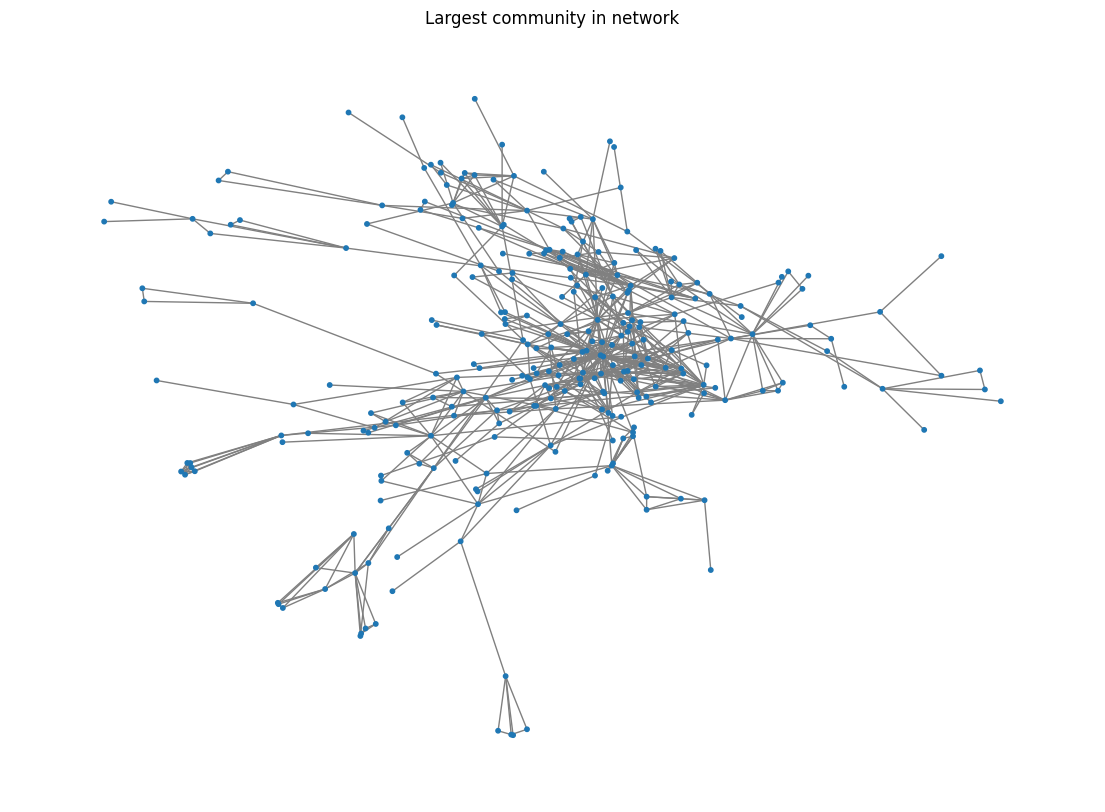

284


In [17]:
largest_community=G.subgraph(max(louvain_communities,key=len))

colors = [node_community[node] for node in largest_community.nodes()]

pos = nx.spring_layout(G,seed=42)

plt.figure(figsize=(14, 10))
plt.title("Largest community in network")
nx.draw(largest_community, pos,
        node_color=colors,
        node_size=10,
        cmap=plt.cm.tab10,
        edge_color='gray')

plt.show()

print(len(largest_community.nodes))

## Modularity and Comparison

In [18]:
print("Louvain Communities")
print(modularity(G,louvain_communities))
print(assortivity_coeff(G,louvain_communities))
print()
print(len(greedy_communities))
print("Greedy Communities")
print(modularity(G,greedy_communities))
print(assortivity_coeff(G,greedy_communities))

print(nx.number_connected_components(largest_community))
print(len(louvain_communities))

Louvain Communities
0.8613422201500223
0.8968418563239727

419
Greedy Communities
0.8192311797585115
0.9024927804911851
1
392


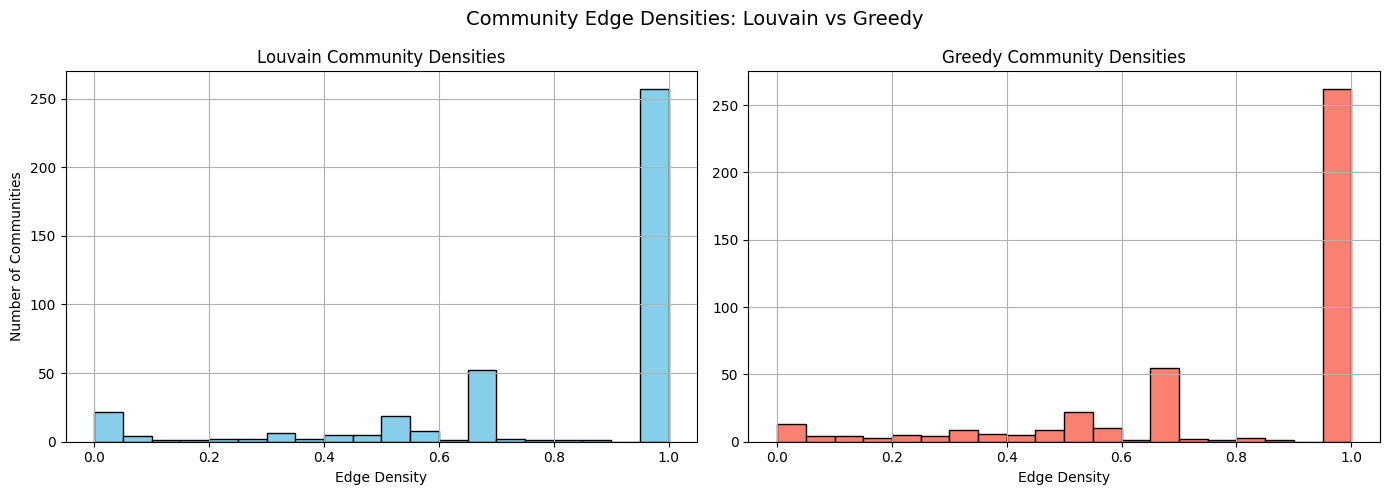

In [19]:
def get_edge_densities(G, communities):
    densities = []
    for c in communities:
        subG = G.subgraph(c)
        n = subG.number_of_nodes()
        e = subG.number_of_edges()
        if n > 1:
            density = 2 * e / (n * (n - 1))
            densities.append(density)
        else:
            densities.append(0)  # handle singleton community
    return densities

# Compute densities
louvain_densities = get_edge_densities(G, louvain_communities)
greedy_densities = get_edge_densities(G, greedy_communities)

# Plotting with plt.subplot
plt.figure(figsize=(14, 5))

# Louvain plot
plt.subplot(1, 2, 1)
plt.hist(louvain_densities, bins=20, color='skyblue', edgecolor='black')
plt.title('Louvain Community Densities')
plt.xlabel('Edge Density')
plt.ylabel('Number of Communities')
plt.grid(True)

# Greedy plot
plt.subplot(1, 2, 2)
plt.hist(greedy_densities, bins=20, color='salmon', edgecolor='black')
plt.title('Greedy Community Densities')
plt.xlabel('Edge Density')
plt.grid(True)

plt.suptitle('Community Edge Densities: Louvain vs Greedy', fontsize=14)
plt.tight_layout()
plt.show()


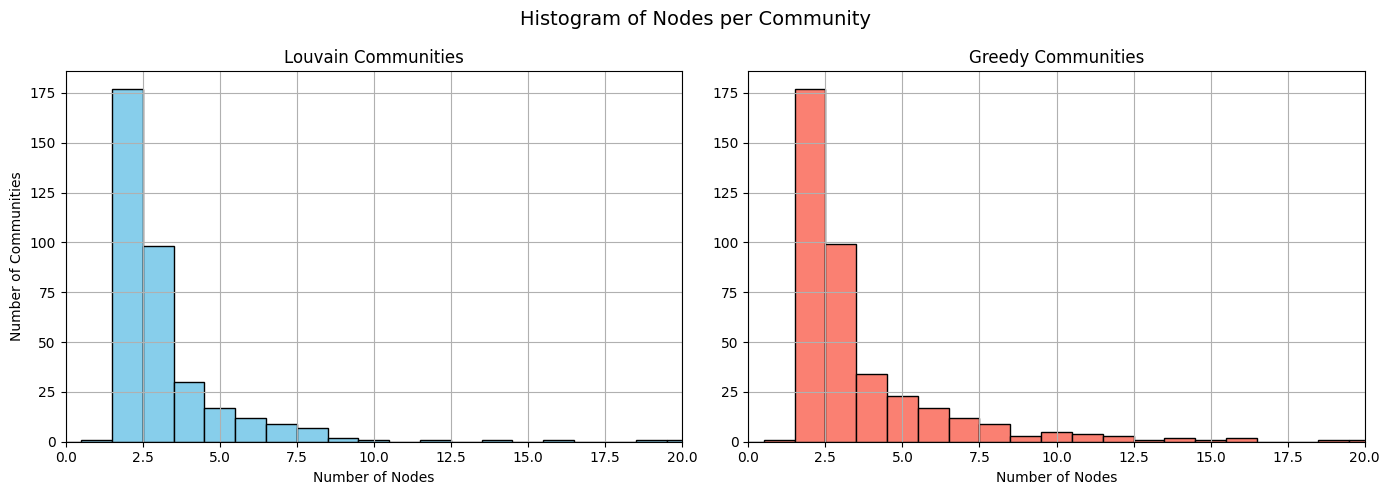

In [20]:
# Get node counts per community
louvain_node_counts = [len(comm) for comm in louvain_communities]
greedy_node_counts = [len(comm) for comm in greedy_communities]

# Set bins so each bin represents 1 node
max_nodes = max(max(louvain_node_counts, default=0), max(greedy_node_counts, default=0))
bins = range(0, max_nodes + 2)

# Plotting
plt.figure(figsize=(14, 5))

# Louvain histogram
plt.subplot(1, 2, 1)
plt.hist(louvain_node_counts, bins=bins, color='skyblue', edgecolor='black', align='left')
plt.title('Louvain Communities')
plt.xlabel('Number of Nodes')
plt.ylabel('Number of Communities')
plt.grid(True)
plt.xlim(0, 20)

# Greedy histogram
plt.subplot(1, 2, 2)
plt.hist(greedy_node_counts, bins=bins, color='salmon', edgecolor='black', align='left')
plt.title('Greedy Communities')
plt.xlabel('Number of Nodes')
plt.grid(True)
plt.xlim(0, 20)

plt.suptitle('Histogram of Nodes per Community', fontsize=14)
plt.tight_layout()
plt.show()


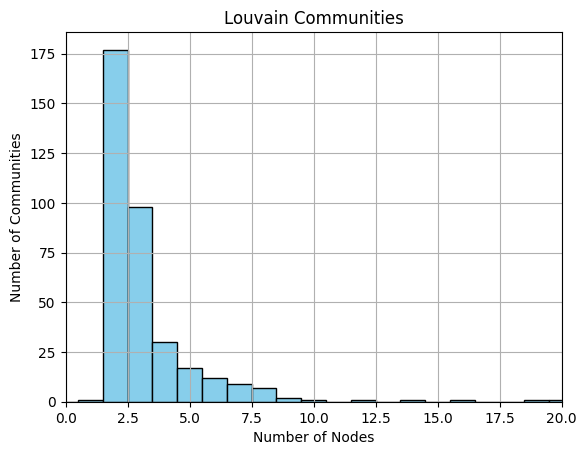

In [21]:
# Get node counts per community
node_counts=[len(comp) for comp in list(nx.connected_components(G))]
# Set bins so each bin represents 1 node
max_nodes = max(node_counts, default=0)
bins = range(0, max_nodes + 2)

# Plotting
plt.plot()
plt.hist(louvain_node_counts, bins=bins, color='skyblue', edgecolor='black', align='left')
plt.title('Louvain Communities')
plt.xlabel('Number of Nodes')
plt.ylabel('Number of Communities')
plt.grid(True)
plt.xlim(0, 20)
plt.show()

# Community detection in Largest Component

In [22]:
S=G.subgraph(largest_component)
louvain_communities=networkx.algorithms.community.louvain_communities(S)
greedy_communities = list(greedy_modularity_communities(S))

In [23]:
print("Louvain Communities")
print(modularity(S,louvain_communities))
print(assortivity_coeff(S,louvain_communities))
print()
print(len(greedy_communities))
print("Greedy Communities")
print(modularity(S,greedy_communities))
print(assortivity_coeff(S,greedy_communities))

print(nx.number_connected_components(largest_community))
print(len(louvain_communities))

Louvain Communities
0.8472295466706528
0.8883638663956299

62
Greedy Communities
0.7993065132292696
0.8867608751986285
1
41


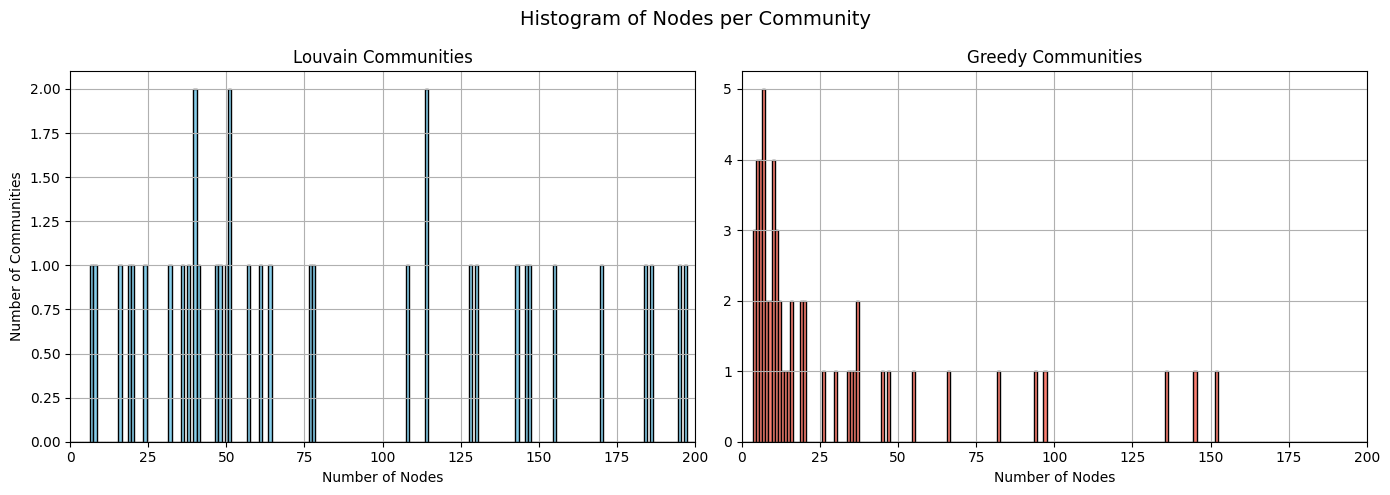

In [24]:
louvain_node_counts = [len(comm) for comm in louvain_communities]
greedy_node_counts = [len(comm) for comm in greedy_communities]

max_nodes = max(max(louvain_node_counts, default=0), max(greedy_node_counts, default=0))
bins = range(0, max_nodes + 2)

# Plotting
plt.figure(figsize=(14, 5))

# Louvain histogram
plt.subplot(1, 2, 1)
plt.hist(louvain_node_counts, bins=bins, color='skyblue', edgecolor='black', align='left')
plt.title('Louvain Communities')
plt.xlabel('Number of Nodes')
plt.ylabel('Number of Communities')
plt.grid(True)
plt.xlim(0, 200)

# Greedy histogram
plt.subplot(1, 2, 2)
plt.hist(greedy_node_counts, bins=bins, color='salmon', edgecolor='black', align='left')
plt.title('Greedy Communities')
plt.xlabel('Number of Nodes')
plt.grid(True)
plt.xlim(0, 200)

plt.suptitle('Histogram of Nodes per Community', fontsize=14)
plt.tight_layout()
plt.show()


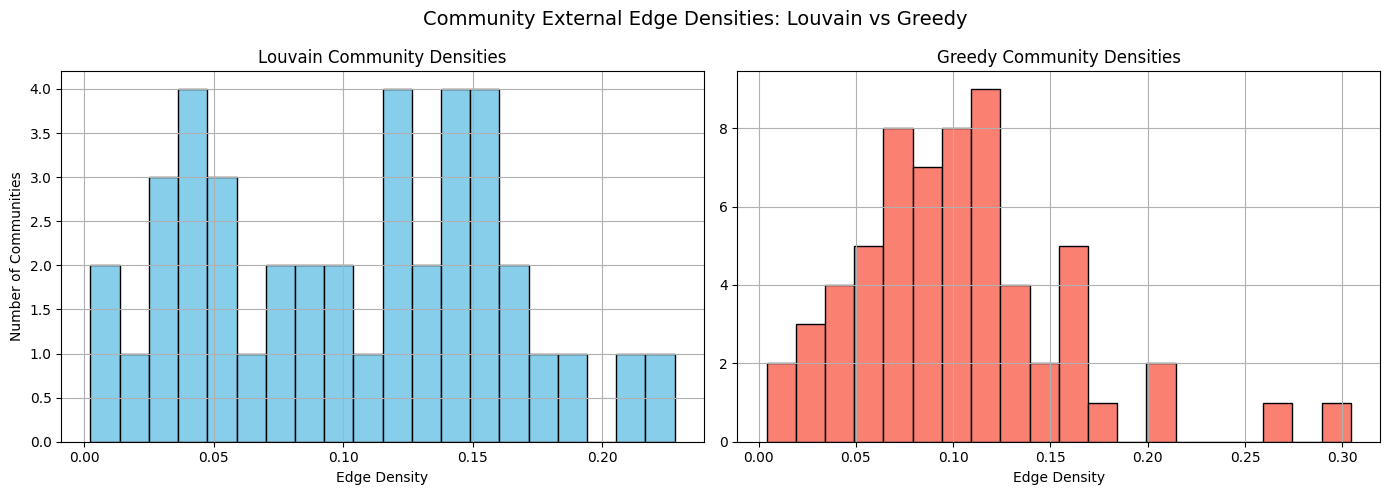

In [25]:
def external_edge_densities(G, communities):
    densities=[]
    for c in communities:
        if len(c)<=1:
            densities.append(0)
            continue
        total_deg=sum(dict(G.degree(c)).values())
        internal_deg=sum(dict(G.subgraph(c).degree()).values())
        if total_deg==0:
            densities.append(0)
        else:
            external_fraction=(total_deg-internal_deg)/total_deg
            densities.append(external_fraction)
    return densities

louvain_densities=external_edge_densities(S, louvain_communities)
greedy_densities=external_edge_densities(S, greedy_communities)

# Plotting
plt.figure(figsize=(14, 5))

# Louvain plot
plt.subplot(1, 2, 1)
plt.hist(louvain_densities, bins=20, color='skyblue', edgecolor='black')
plt.title('Louvain Community Densities')
plt.xlabel('Edge Density')
plt.ylabel('Number of Communities')
plt.grid(True)

# Greedy plot
plt.subplot(1, 2, 2)
plt.hist(greedy_densities, bins=20, color='salmon', edgecolor='black')
plt.title('Greedy Community Densities')
plt.xlabel('Edge Density')
plt.grid(True)

plt.suptitle('Community External Edge Densities: Louvain vs Greedy', fontsize=14)
plt.tight_layout()
plt.show()

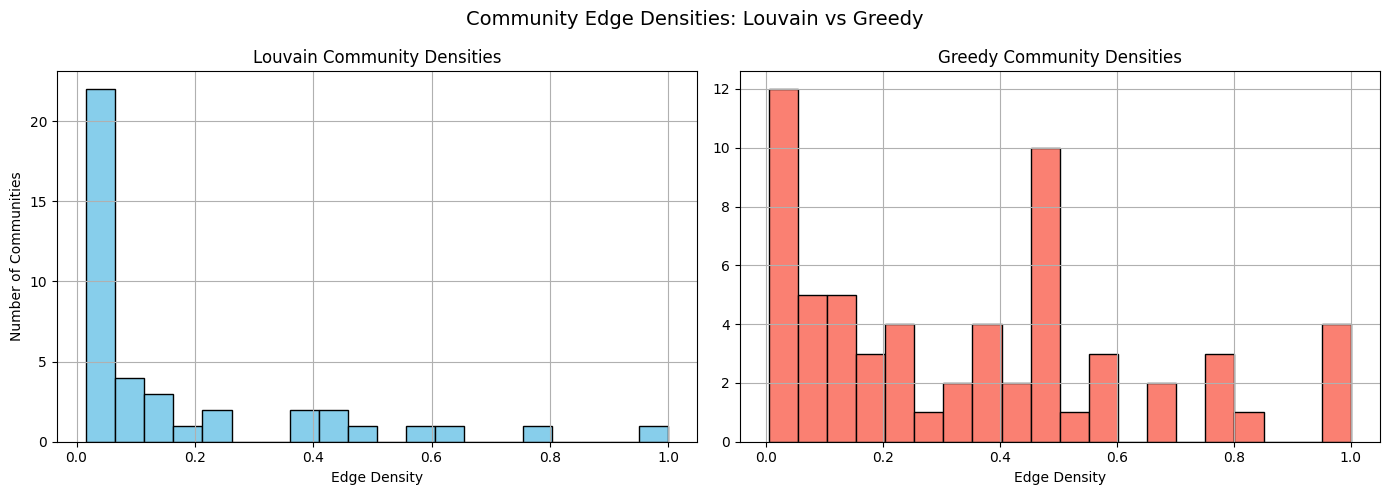

In [26]:
def get_edge_densities(G, communities):
    densities=[]
    for c in communities:
        subG = G.subgraph(c)
        n = subG.number_of_nodes()
        e = subG.number_of_edges()
        if n > 1:
            density = 2 * e / (n * (n - 1))
            densities.append(density)
        else:
            densities.append(0)  
    return densities

louvain_densities = get_edge_densities(S, louvain_communities)
greedy_densities = get_edge_densities(S, greedy_communities)

# Plotting
plt.figure(figsize=(14, 5))

# Louvain plot
plt.subplot(1, 2, 1)
plt.hist(louvain_densities, bins=20, color='skyblue', edgecolor='black')
plt.title('Louvain Community Densities')
plt.xlabel('Edge Density')
plt.ylabel('Number of Communities')
plt.grid(True)

# Greedy plot
plt.subplot(1, 2, 2)
plt.hist(greedy_densities, bins=20, color='salmon', edgecolor='black')
plt.title('Greedy Community Densities')
plt.xlabel('Edge Density')
plt.grid(True)

plt.suptitle('Community Edge Densities: Louvain vs Greedy', fontsize=14)
plt.tight_layout()
plt.show()